In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
penguins = sns.load_dataset("penguins")
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[344 rows x 7 columns]

In [13]:
# isna() => NaN 값만 추출
penguins[penguins.isna().any(axis=1)]

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen             NaN            NaN                NaN   
8    Adelie  Torgersen            34.1           18.1              193.0   
9    Adelie  Torgersen            42.0           20.2              190.0   
10   Adelie  Torgersen            37.8           17.1              186.0   
11   Adelie  Torgersen            37.8           17.3              180.0   
47   Adelie      Dream            37.5           18.9              179.0   
246  Gentoo     Biscoe            44.5           14.3              216.0   
286  Gentoo     Biscoe            46.2           14.4              214.0   
324  Gentoo     Biscoe            47.3           13.8              216.0   
336  Gentoo     Biscoe            44.5           15.7              217.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   

     body_mass_g  sex  
3            NaN  NaN  
8         3475.0  NaN  
9         4250.0  NaN  
10        3300.0  NaN  
11        3700.0  NaN  
47        2975.0  NaN  
246       4100.0  NaN  
286       4650.0  NaN  
324       4725.0  NaN  
336       4875.0  NaN  
339          NaN  NaN

In [14]:
penguins.isnull().sum(axis=1) > 0

0      False
1      False
2      False
3       True
4      False
       ...  
339     True
340    False
341    False
342    False
343    False
Length: 344, dtype: bool

In [28]:
# sex 열에 NaN값 제거 - drop()
penguins_nonesex = penguins[penguins.isna().any(axis=1)]
penguins.drop(penguins_nonesex.index, inplace=True)
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
4         3450.0  Female  
5         3650.0    Male  
..           ...     ...  
338       4925.0  Female  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  
343       5400.0    Male  

[333 rows x 7 columns]

In [47]:
# sex 열에 NaN값 제거 - drpona()
penguins.dropna(subset=["sex"], inplace=True)
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  Adelie  Chinstrap  Gentoo  
0         3750.0    Male       1          0       0  
1         3800.0  Female       1          0       0  
2         3250.0  Female       1          0       0  
4         3450.0  Female       1          0       0  
5         3650.0    Male       1          0       0  
..           ...     ...     ...        ...     ...  
338       4925.0  Female       0          0       1  
340       4850.0  Female       0          0       1  
341       5750.0    Male       0          0       1  
342       5200.0  Female       0          0       1  
343       5400.0    Male       0          0       1  

[333 rows x 10 columns]

In [41]:
# column 'Adelie', 'Chinstrap', 'Gentoo' 추가 후 데이터값 입력
penguins['Adelie'] = penguins.apply(lambda x: 1 if x.species == 'Adelie' else 0, axis=1)
penguins['Chinstrap'] = penguins.apply(lambda x: 1 if x.species == 'Chinstrap' else 0, axis=1)
penguins['Gentoo'] = penguins.apply(lambda x: 1 if x.species == 'Gentoo' else 0, axis=1)
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  Adelie  Chinstrap  Gentoo  
0         3750.0    Male       1          0       0  
1         3800.0  Female       1          0       0  
2         3250.0  Female       1          0       0  
4         3450.0  Female       1          0       0  
5         3650.0    Male       1          0       0  
..           ...     ...     ...        ...     ...  
338       4925.0  Female       0          0       1  
340       4850.0  Female       0          0       1  
341       5750.0    Male       0          0       1  
342       5200.0  Female       0          0       1  
343       5400.0    Male       0          0       1  

[333 rows x 10 columns]

In [50]:
# column 'Adelie', 'Chinstrap', 'Gentoo' 추가 후 반복문을 통해 데이터값 입력
species_list = penguins["species"].unique()

for i in species_list:
    penguins[i] = penguins.apply(lambda x: 1 if x.species == i else 0, axis=1)
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  Adelie  Chinstrap  Gentoo  
0         3750.0    Male       1          0       0  
1         3800.0  Female       1          0       0  
2         3250.0  Female       1          0       0  
4         3450.0  Female       1          0       0  
5         3650.0    Male       1          0       0  
..           ...     ...     ...        ...     ...  
338       4925.0  Female       0          0       1  
340       4850.0  Female       0          0       1  
341       5750.0    Male       0          0       1  
342       5200.0  Female       0          0       1  
343       5400.0    Male       0          0       1  

[333 rows x 10 columns]

## 히스토그램 - displot() hue로 subset 나누기

## 히스토그램 - distplot() col로 그래프 나누기

    - displot() : col 키워드 인수

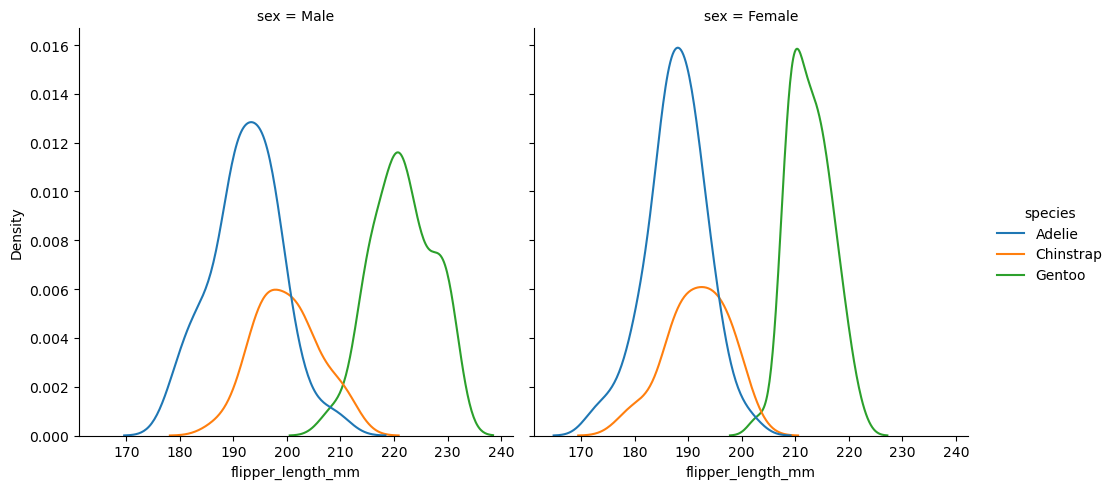

In [52]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', col='sex', kind='kde')

## 히스토그램 - displot() 그래프 크기 설정

    - hieght, aspect

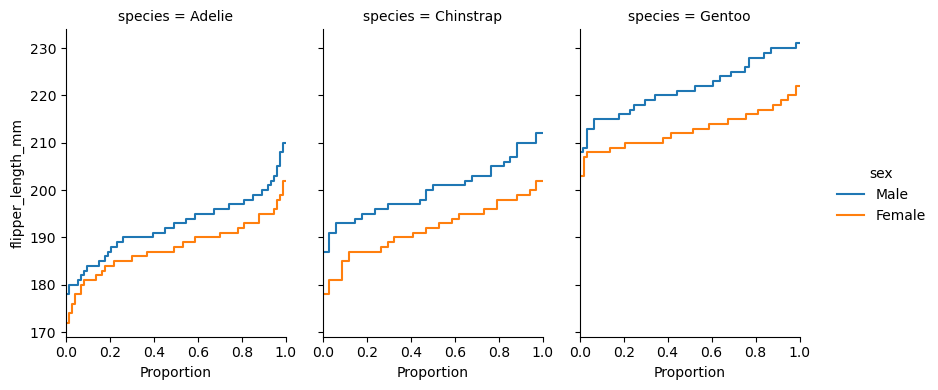

In [55]:
sns.displot(
    data=penguins, y='flipper_length_mm', hue='sex', col='species'
    ,kind='ecdf', height=4, aspect=.7,
)

## 히스토그램 - displot() col로 그래프 나누기

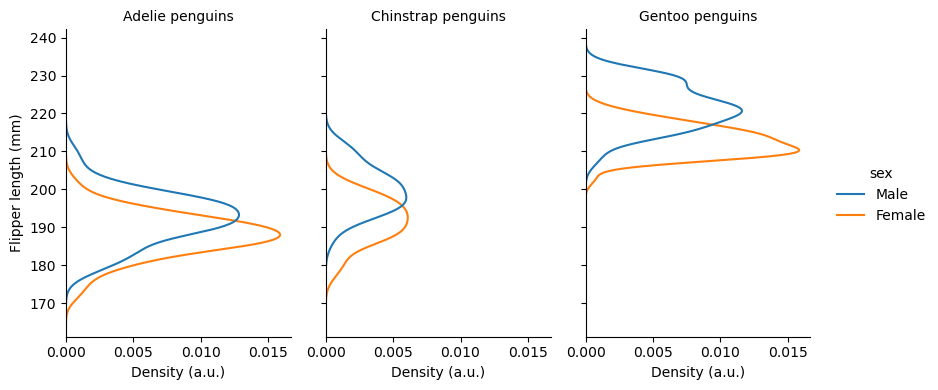

In [57]:
g = sns.displot(
    data=penguins, y='flipper_length_mm', hue='sex', col='species'
    ,kind='kde', height=4, aspect=.7,
)
g.set_axis_labels("Density (a.u.)", "Flipper length (mm)")
g.set_titles("{col_name} penguins")

## barplot()

    - 카테고리
    

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

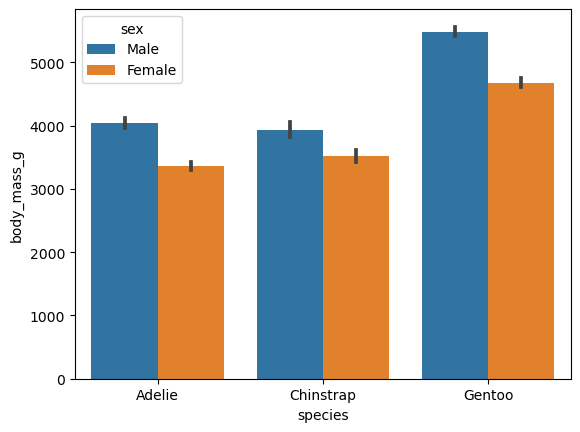

In [58]:
# body_mass_g값의 평균과 신뢰구간을 구해서 바 플롯으로 표현하고 있음.
df = sns.load_dataset("penguins")
sns.barplot(data=df, x='species', y='body_mass_g', hue='sex')

## boxplot()

    - 박스-휘스커 플롯(Bos=Whisker Plot): 박스와 박스 바깥의 선(whisker)으로 이루어짐.
    - 실수 값 분포에서 1사분위수와 3사분위수를 뜻함.
    - 3사분위수와 1사분위수의 차이를 IQR(interquartile range)라고 함.
    - 박스 내부의 가로선은 중앙값
    - 박스 외부의 세로선은 1사분위 수보다 1,5*IQR만큼 낮은 값과
    - 그 바깥의 점은 아웃라이어(outlier)라고 부르는데 일일히 점으로 표시함.

<AxesSubplot:xlabel='age'>

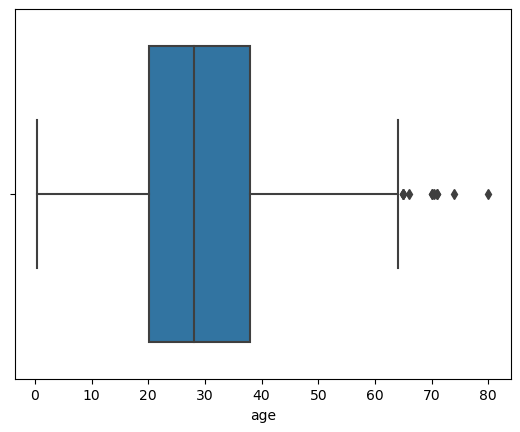

In [59]:
df = sns.load_dataset("titanic")
sns.boxplot(x=df['age'])

<AxesSubplot:xlabel='age', ylabel='class'>

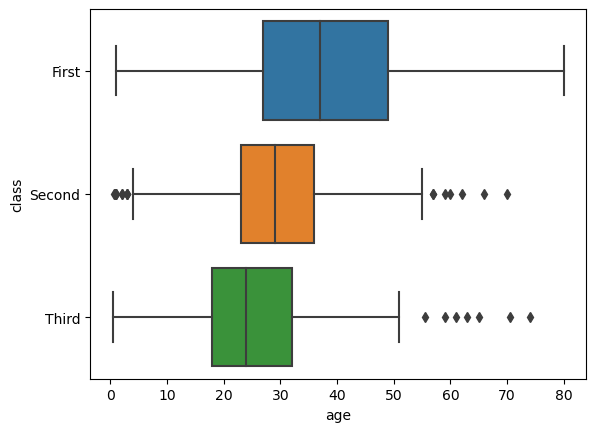

In [60]:
# class column의 Dtype은 카테고리, 카테고리화된 column을 하나의 분류값으로 하기 위해 y 키워드 인수
# y축을 기준으로 카테고리별 box plot을 unique한 value의 개수만큼 나눠서 얻을 수 있음.
sns.boxplot(data=df, x='age', y='class')

<AxesSubplot:xlabel='age', ylabel='class'>

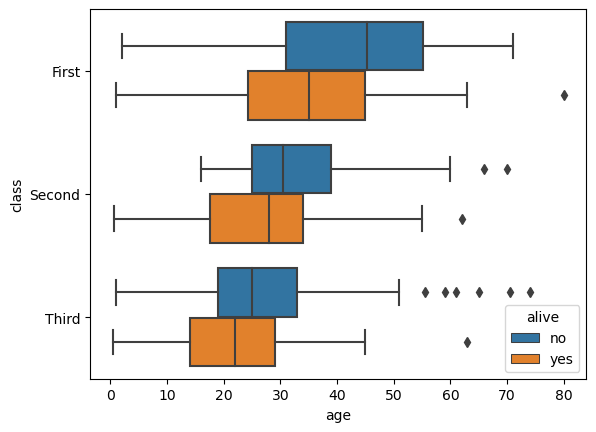

In [65]:
sns.boxplot(data=df, x='age', y='class', hue='alive')

<AxesSubplot:xlabel='fare', ylabel='alive'>

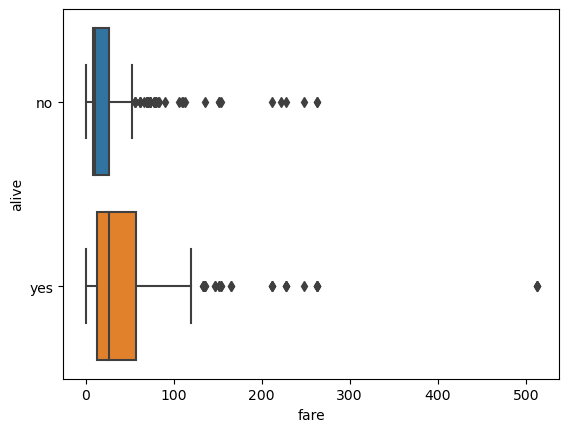

In [66]:
# order 키워드 인수
sns.boxplot(data=df, x='fare', y='alive')

<AxesSubplot:xlabel='fare', ylabel='alive'>

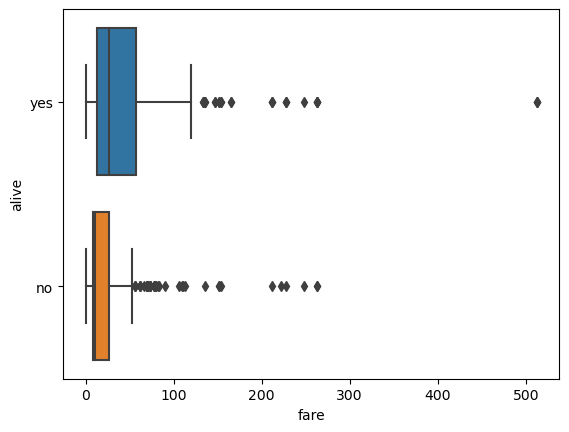

In [67]:
# order 키워드 인수
sns.boxplot(data=df, x='fare', y='alive', order=['yes', 'no'])

<AxesSubplot:>

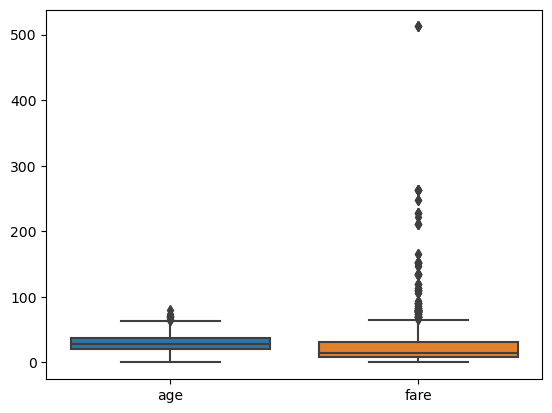

In [72]:
# data 키워드 인수 / orient 키워드 인수
sns.boxplot(data=df[['age','fare']], orient="v")

## violinplot()

    - box plot과 kde(커널 밀도 함수) 둘을 콤비네이션한 그래프
    - 세로방향으로 kde의 모댱을 그리는데 kde가 좌우 대칭되게 그려짐.
    - 샘플 사이즈에 따라 분포에 영향이 있을 수 있음.

<AxesSubplot:xlabel='age'>

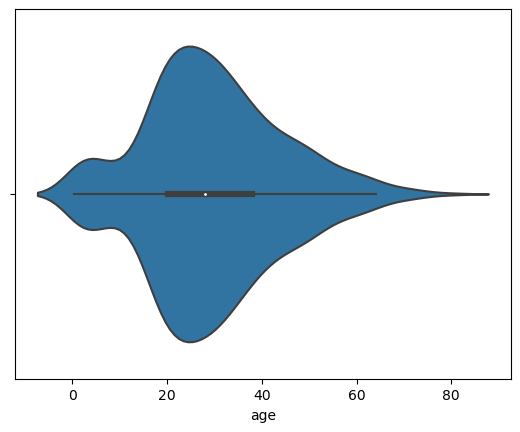

In [73]:
df = sns.load_dataset('titanic')
sns.violinplot(x=df['age'])

<AxesSubplot:xlabel='age', ylabel='class'>

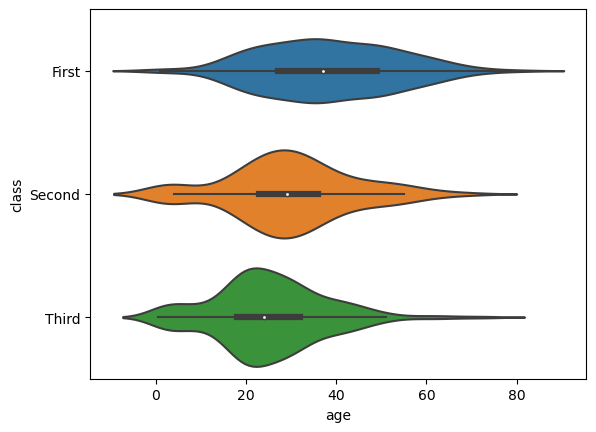

In [74]:
# 카테고리 Dtype을 갖는 class column을 활용하여 y축의 값으로 설정
sns.violinplot(data=df, x='age', y='class')

<AxesSubplot:xlabel='class', ylabel='age'>

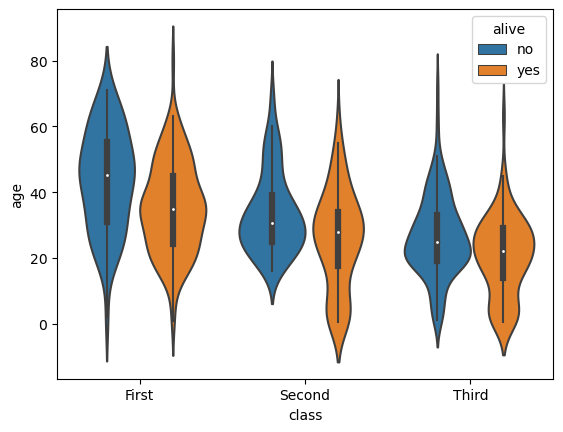

In [75]:
sns.violinplot(data=df, x='class', y='age', hue='alive')

<AxesSubplot:xlabel='deck', ylabel='age'>

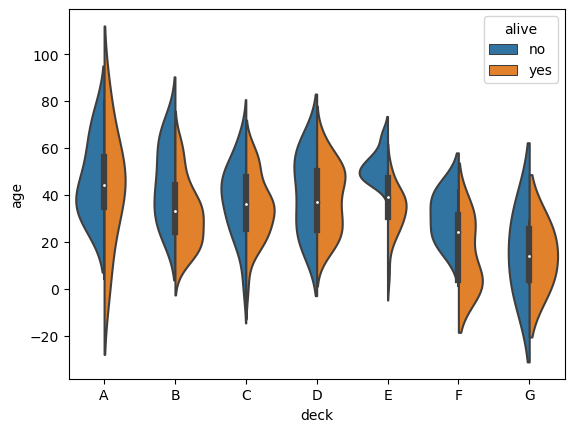

In [78]:
#split 키워드 인수
sns.violinplot(data=df, x='deck', y='age', hue='alive', split=True)

In [79]:
# hue의 level이 정확히 2개가 아니라면?
sns.violinplot(data=df, x='deck', y='age', hue='class', split=True)

ValueError: There must be exactly two hue levels to use `split`.'

<AxesSubplot:xlabel='age', ylabel='alive'>

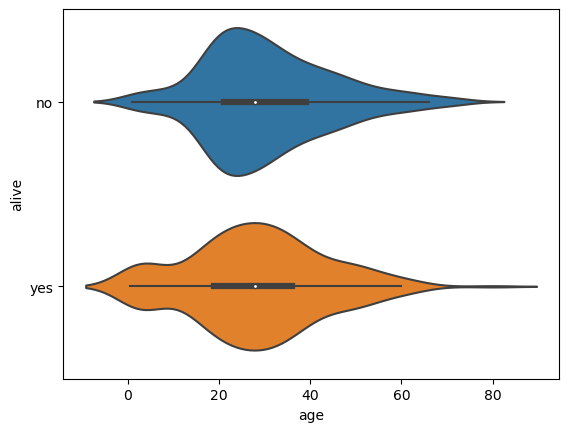

In [80]:
# violinplot() - 범위 제한
sns.violinplot(data=df, x='age', y='alive')

<AxesSubplot:xlabel='age', ylabel='alive'>

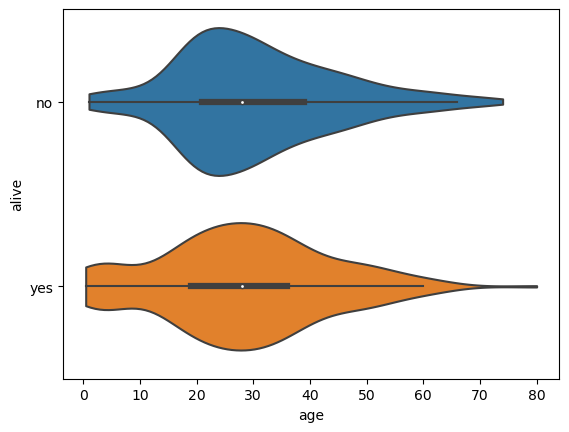

In [81]:
# violinplot() - cut 키워드 인수
sns.violinplot(data=df, x='age', y='alive', cut=0)

<AxesSubplot:xlabel='age', ylabel='alive'>

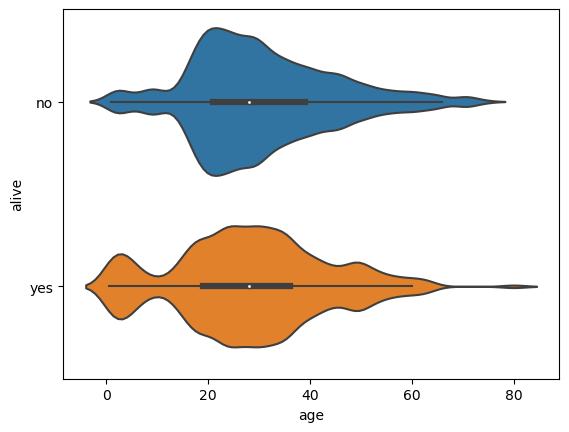

In [82]:
# violinplot() - kde의 그래프 모양을 부드럽게 처리
sns.violinplot(data=df, x='age', y='alive', bw=.15)

<AxesSubplot:xlabel='age', ylabel='embark_town'>

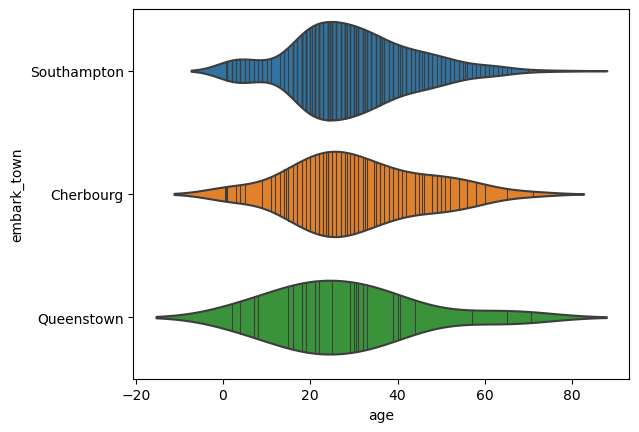

In [83]:
# violinplot() - 내부 데이터의 분포를 직접적으로 표현(inner 키워드 인수)
sns.violinplot(data=df, x='age', y='embark_town', inner='stick')

<AxesSubplot:xlabel='age', ylabel='embark_town'>

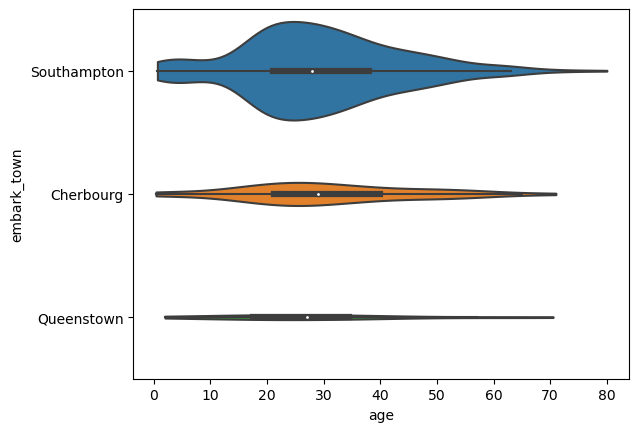

In [84]:
# violinplot() - scale
sns.violinplot(data=df, x='age', y='embark_town', scale='count', cut=0)

## stripplot()

    - 카테고리마다의 scatter plot을 그림.
    - jitter

<AxesSubplot:xlabel='total_bill'>

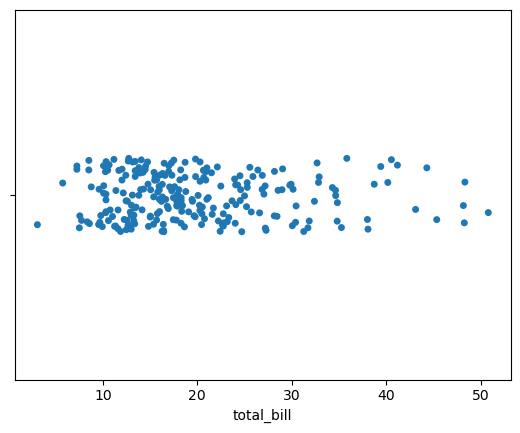

In [87]:
tips = sns.load_dataset('tips')
sns.stripplot(data=tips, x='total_bill')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

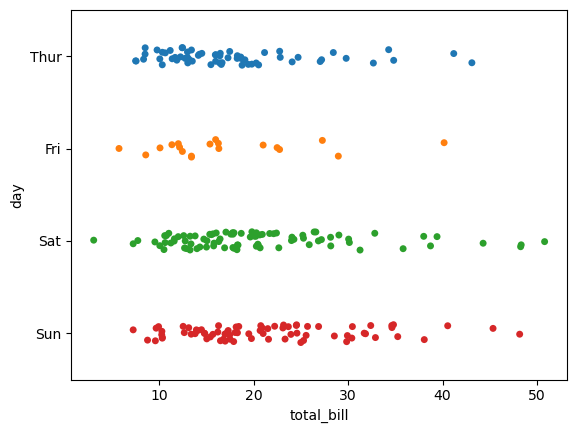

In [88]:
sns.stripplot(data=tips, x='total_bill', y='day')


<AxesSubplot:xlabel='day', ylabel='total_bill'>

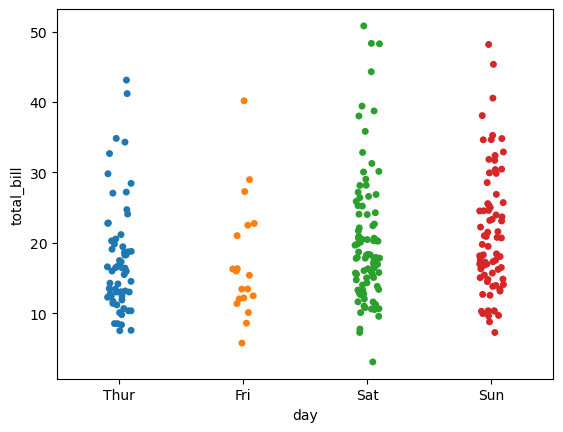

In [89]:
sns.stripplot(data=tips, x='day', y='total_bill')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

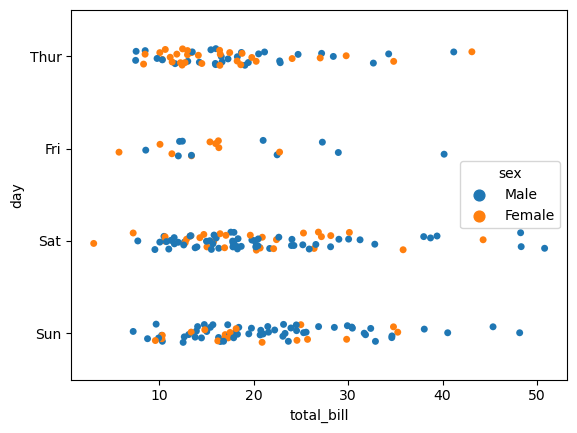

In [91]:
sns.stripplot(data=tips, x='total_bill', y='day', hue='sex')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

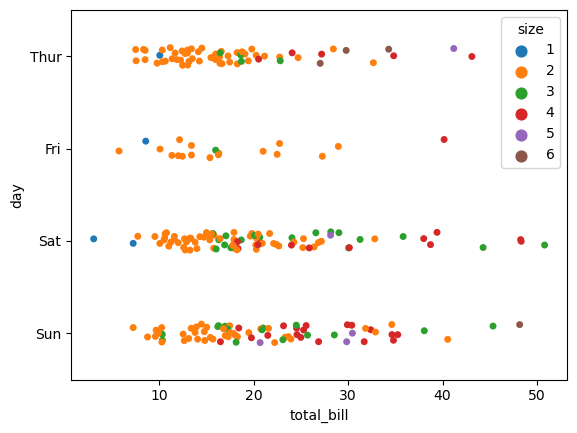

In [96]:
sns.stripplot(data=tips, x='total_bill', y='day', hue='size')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

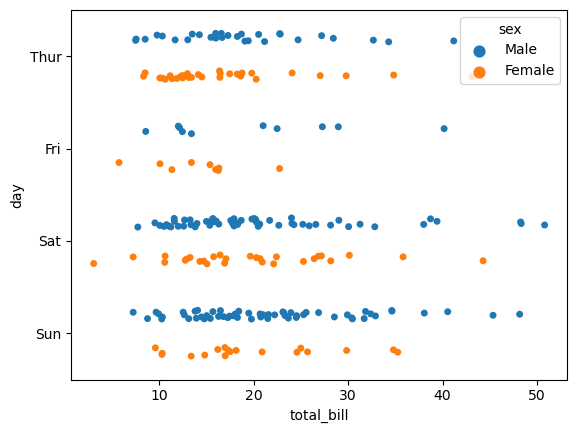

In [95]:
sns.stripplot(data=tips, x='total_bill', y='day', hue='sex', dodge=True)

## swarmplot()

    - strip plot과 매우 흡사하지만, 데이터를 마커로 표현할 때 절대로 겹치지 않게 표현함.
    - 정확한 데이터의 분포를 표현하기에 더 없이 좋은 그래프이지만, 아주 큰 스켘일의 데이터를 표현하기에 필요한 너비가 너무 넓어져 적합하지 않음.

<AxesSubplot:xlabel='total_bill'>

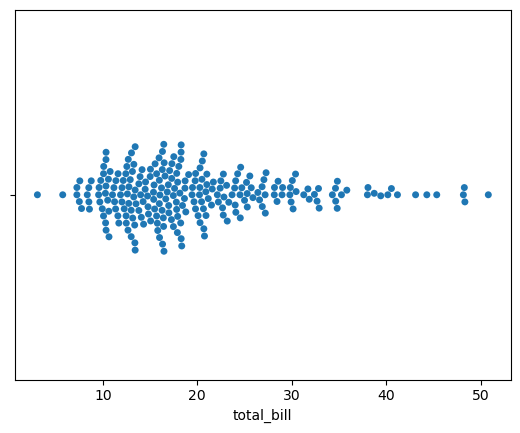

In [97]:
#
tips = sns.load_dataset('tips')
sns.swarmplot(data=tips, x='total_bill')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

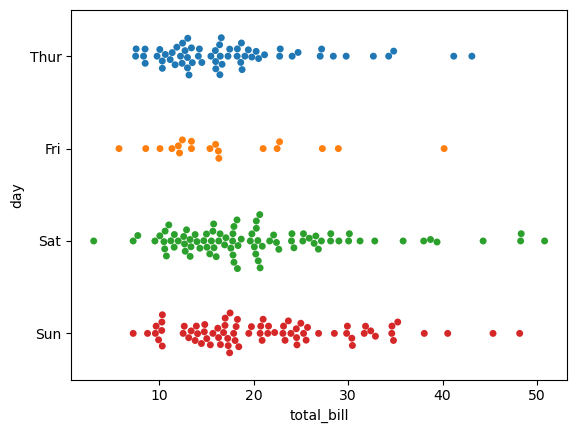

In [98]:
sns.swarmplot(data=tips, x='total_bill', y='day')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

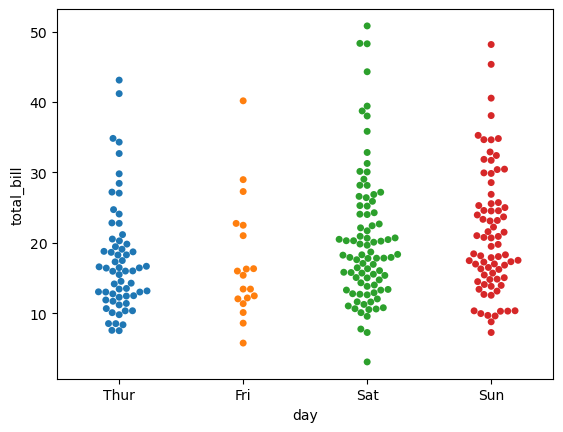

In [99]:
sns.swarmplot(data=tips, x='day', y='total_bill')

<AxesSubplot:xlabel='total_bill', ylabel='day'>

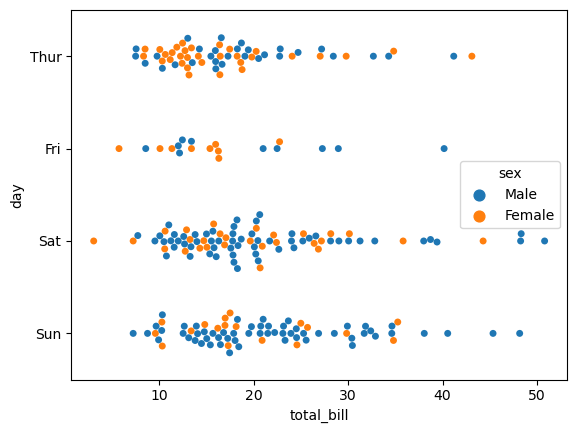

In [100]:
# swarmplot - hue 키워드 인수
sns.swarmplot(data=tips, x='total_bill', y='day', hue='sex')

/Users/kimminsoo/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='total_bill', ylabel='day'>

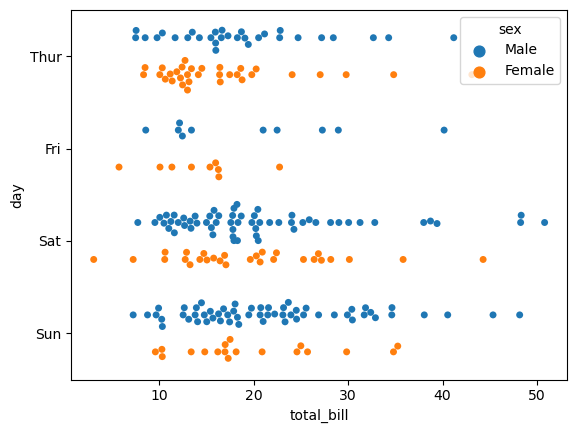

In [101]:
# swarmplot() - dodge
sns.swarmplot(data=tips, x='total_bill', y='day', hue='sex', dodge=True)
# Warning 

/Users/kimminsoo/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:1378: UserWarning: You passed a edgecolor/edgecolors ('#3d3d3d') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(swarm_data, cat_pos, s=s, **kws)


<AxesSubplot:xlabel='total_bill', ylabel='day'>

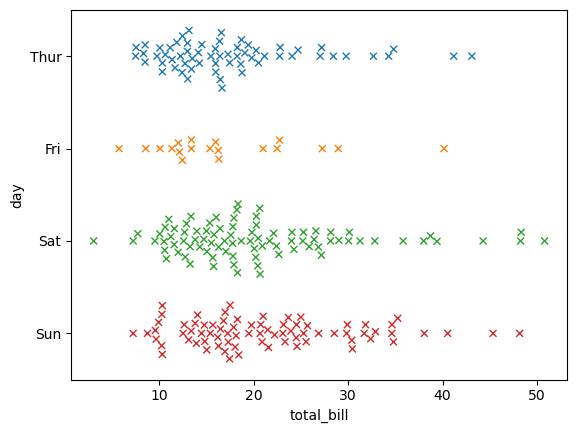

In [102]:
# swarmplot() - scatter() 메서드
sns.swarmplot(
    data=tips, x='total_bill', y='day',
    marker='x', linewidth=1,
)

## catplot()

    - categorical plot: axes-level(row, col)까지 분류를 나눌 수 있음.(즉, 카테고리화를 더 세분화해서 작업할 수 있음)

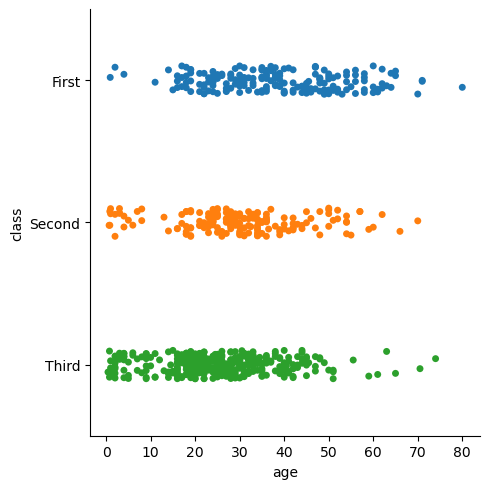

In [103]:
# catplot() - kind를 선택하지 않을 때
df = sns.load_dataset('titanic')
sns.catplot(data=df, x='age', y='class')

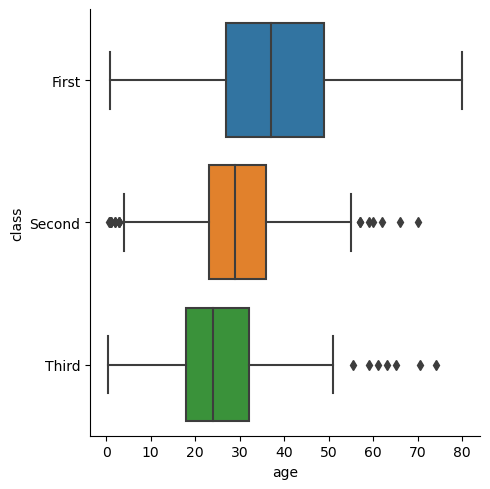

In [104]:
sns.catplot(data=df, x='age', y='class', kind='box')

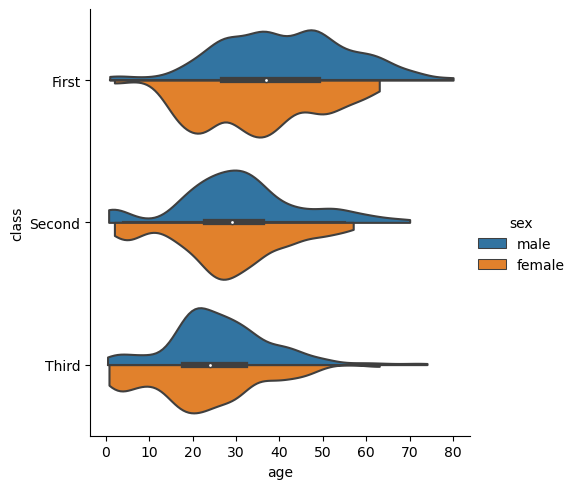

In [105]:
sns.catplot(
    data=df, x='age', y='class', hue='sex',
    kind='violin', bw=.25, cut=0, split=True,
)

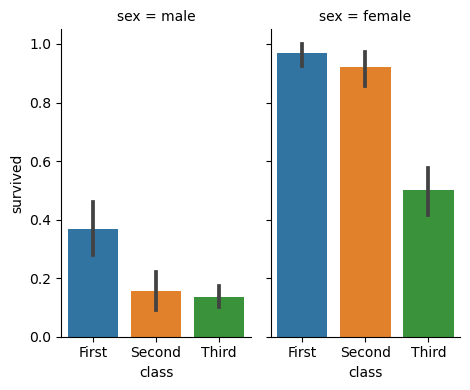

In [107]:
sns.catplot(
    data=df, x='class', y='survived', col='sex',
    kind='bar', height=4, aspect=.6,
)

<AxesSubplot:xlabel='age', ylabel='class'>

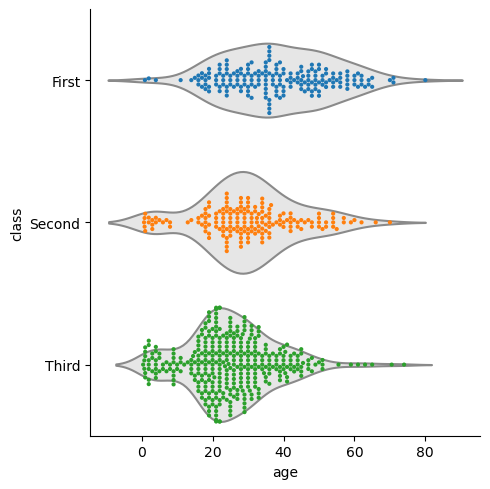

In [108]:
# catplot() - 연속해서 그래프를 그리는 메서드를
sns.catplot(data=df, x='age', y='class', kind='violin', color='.9', inner=None)
sns.swarmplot(data=df, x='age', y='class', size=3)

## jointplot()

    - 두 개의 변수의 분포를 나타낼 때 활용하면 좋은 플롯
    - histogram과 scatter plot을 동시에 사용해서 시각적 효과를 표현
    

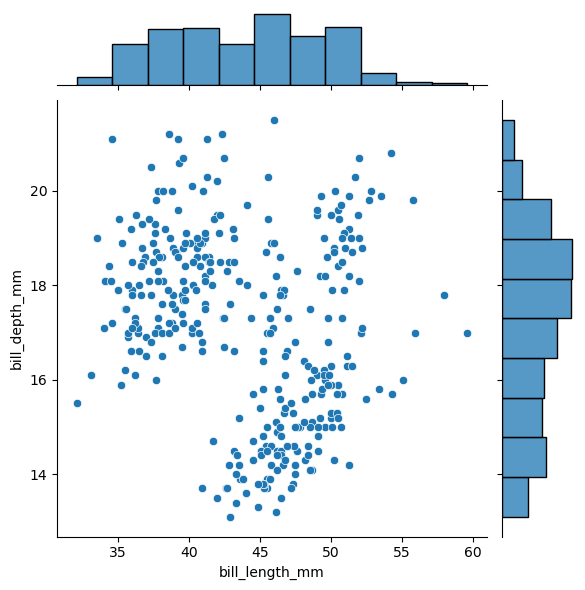

In [109]:
penguins = sns.load_dataset('penguins')
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm')

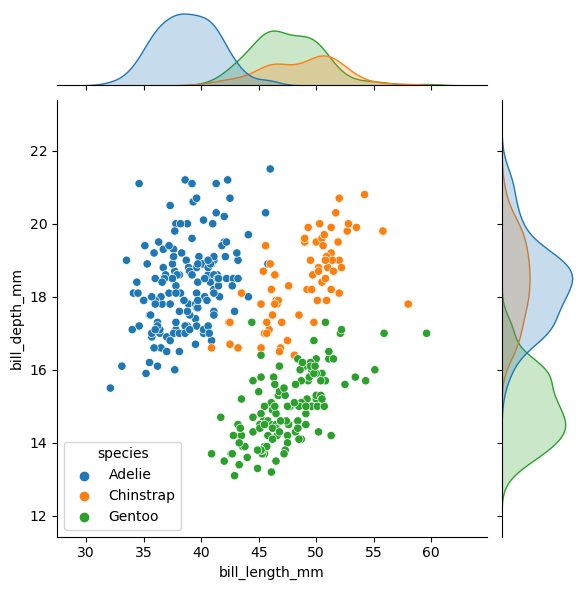

In [110]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

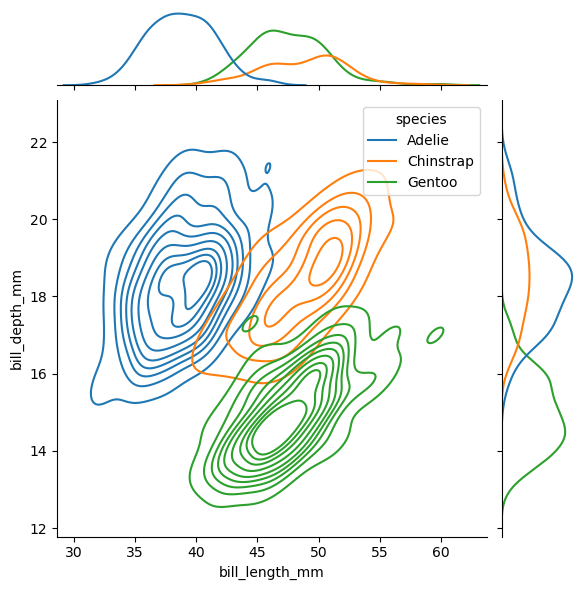

In [111]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', kind='kde')

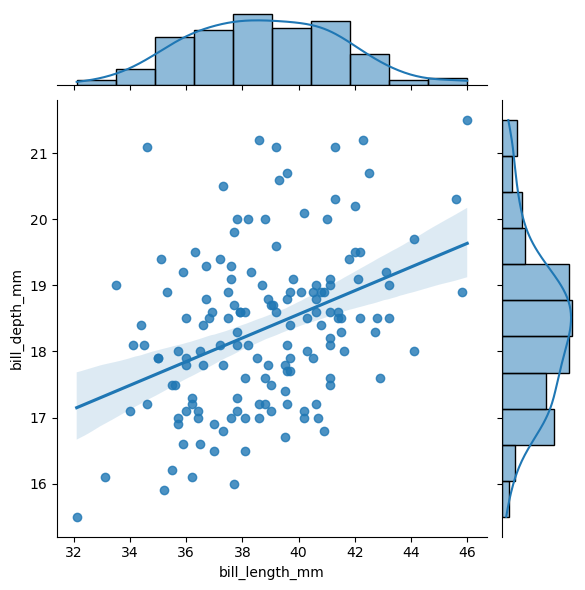

In [117]:
# jointplot() - kind 키워드 인수에 reg값을 전달해서 선형 회귀에 대한 결과 
# hue와 kind='reg'는 동시에 사용될 수 없는 옵션
adelie_penguins = penguins[penguins['species'] == 'Adelie']
sns.jointplot(data=adelie_penguins, x='bill_length_mm', y='bill_depth_mm', kind='reg')

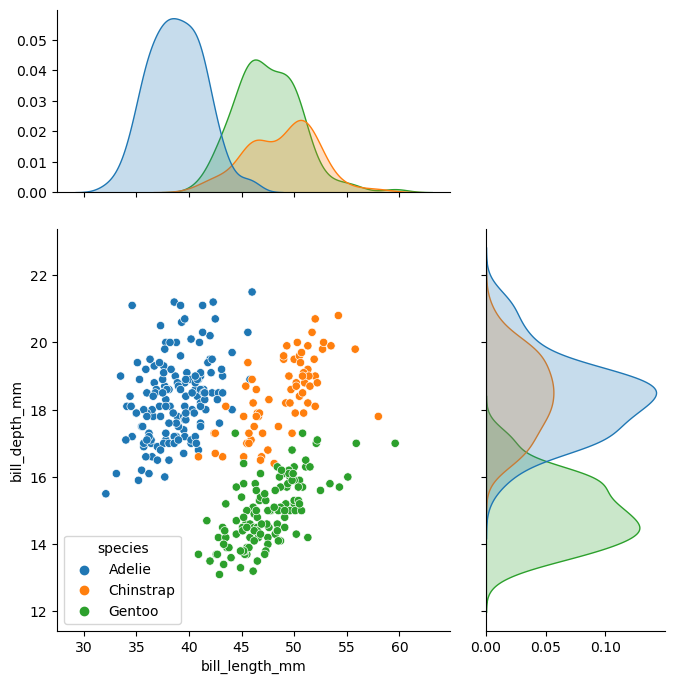

In [118]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species',
              height=7, ratio=2, marginal_ticks='True')

## pairplot()

    - 데이터셋 내의 각 column마다 pair로 경우에 수에 따라 묶고 그에 따른 결과를 일목요연하게 한번에 확인할 수 있는 플롯

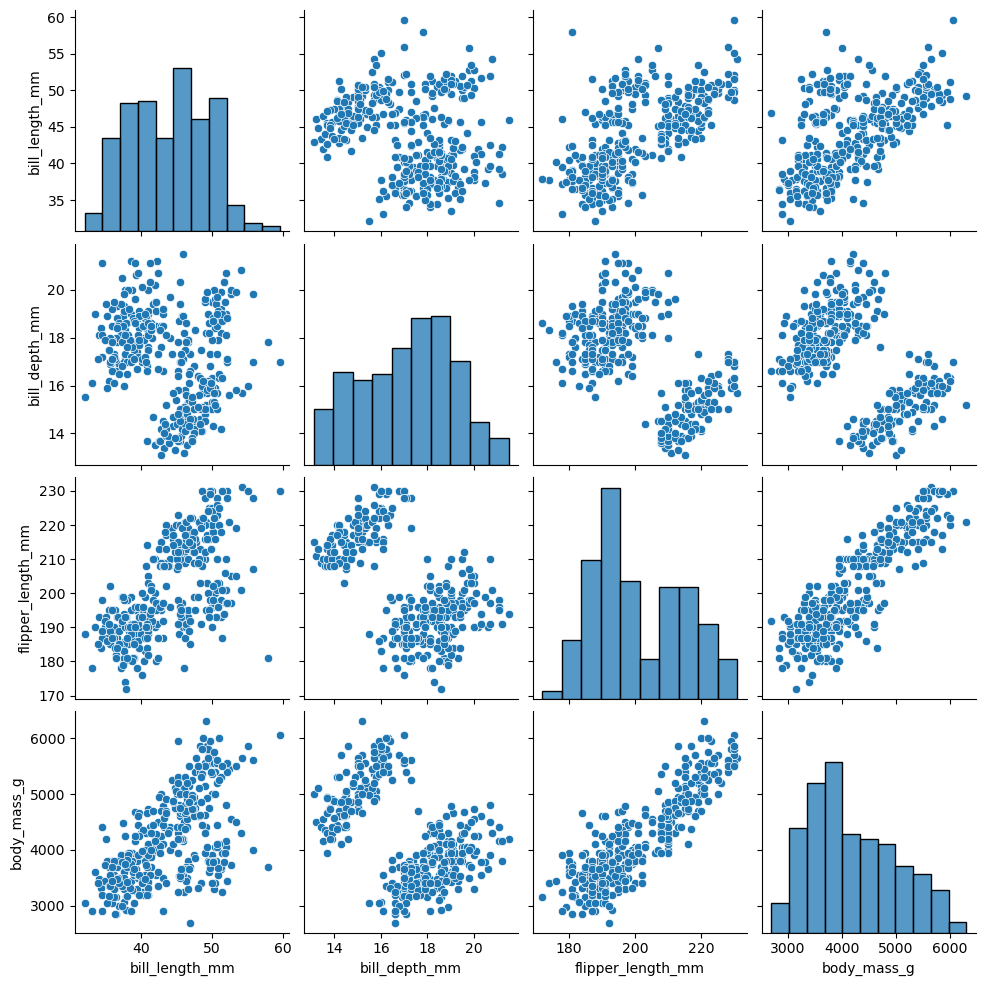

In [119]:
penguins = sns.load_dataset('penguins')
sns.pairplot(penguins)

## pairplot()


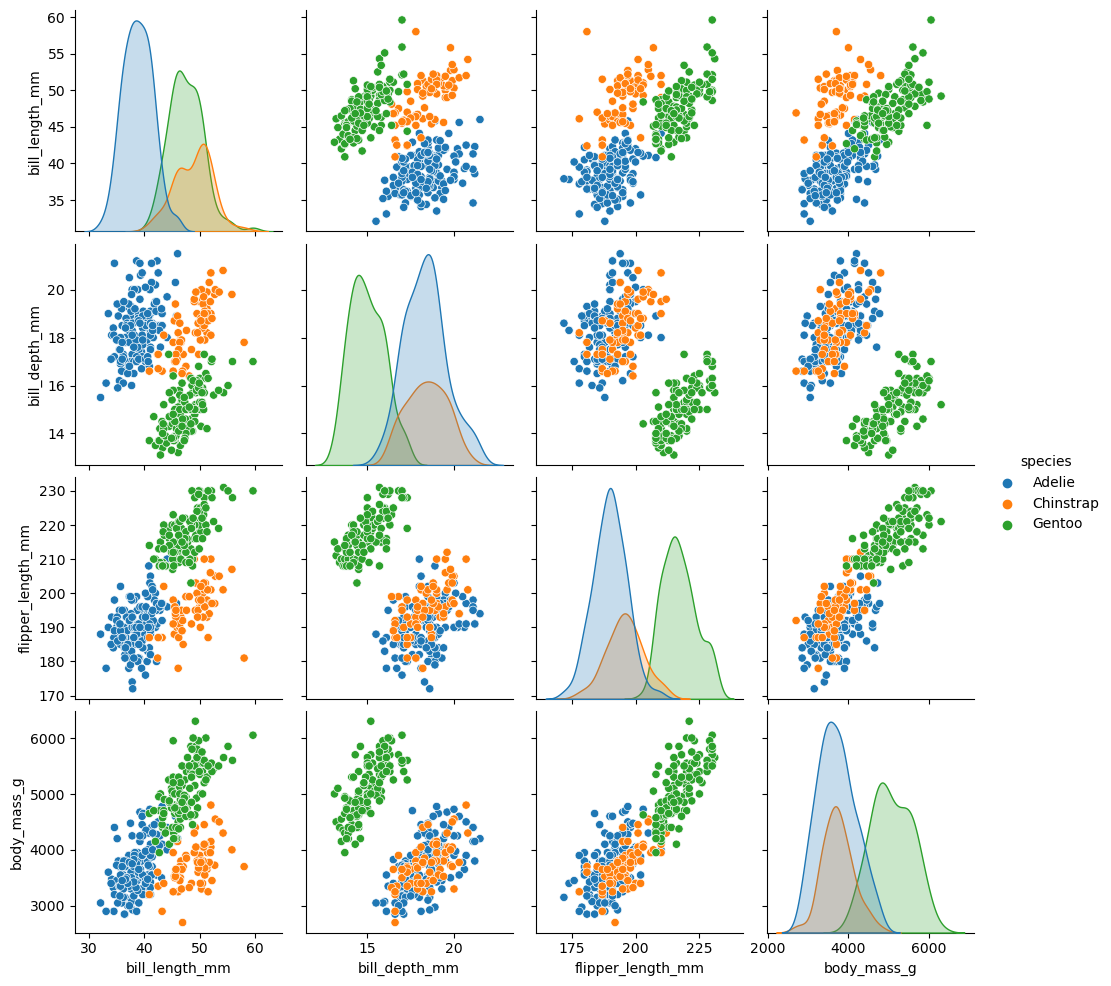

In [120]:
sns.pairplot(penguins, hue='species')

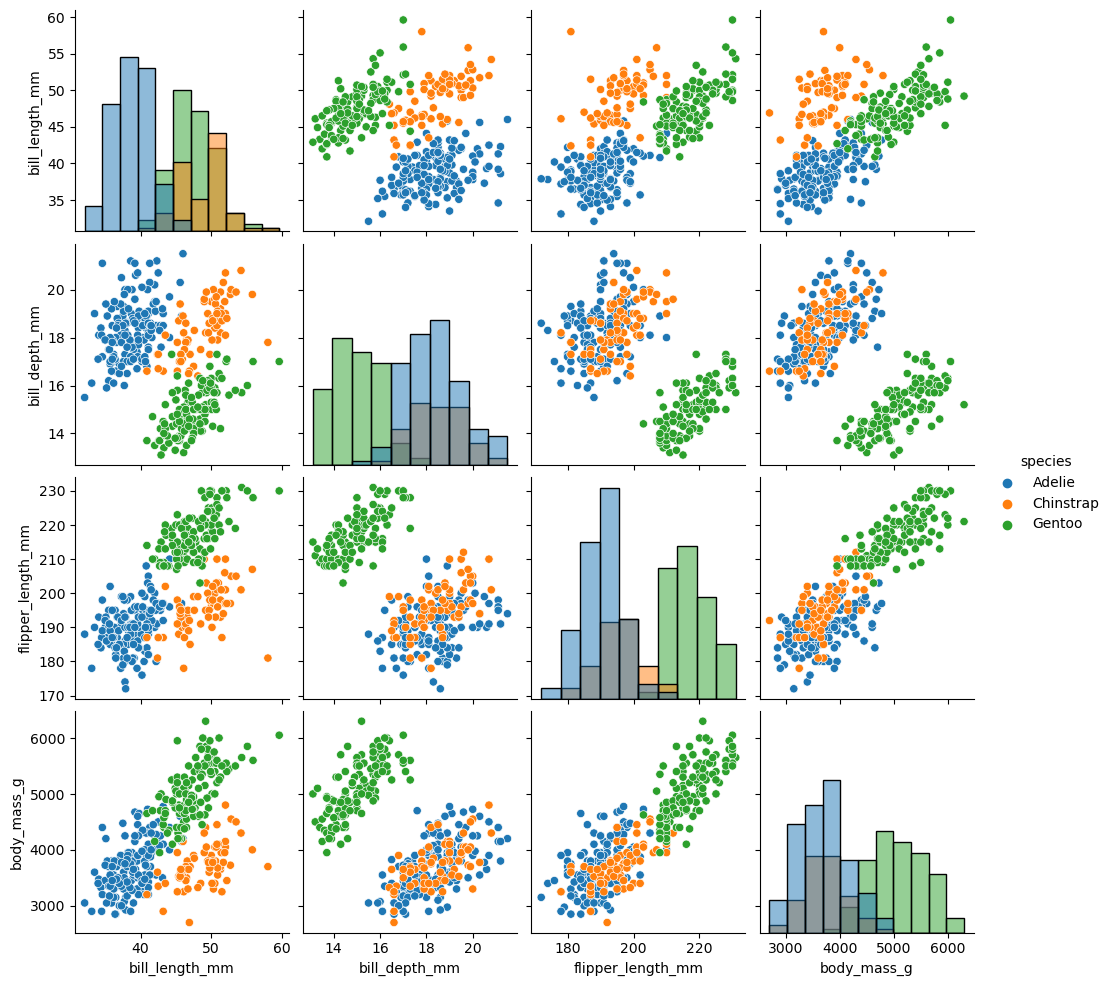

In [122]:
# pairplot()
sns.pairplot(penguins, hue='species', diag_kind='hist')

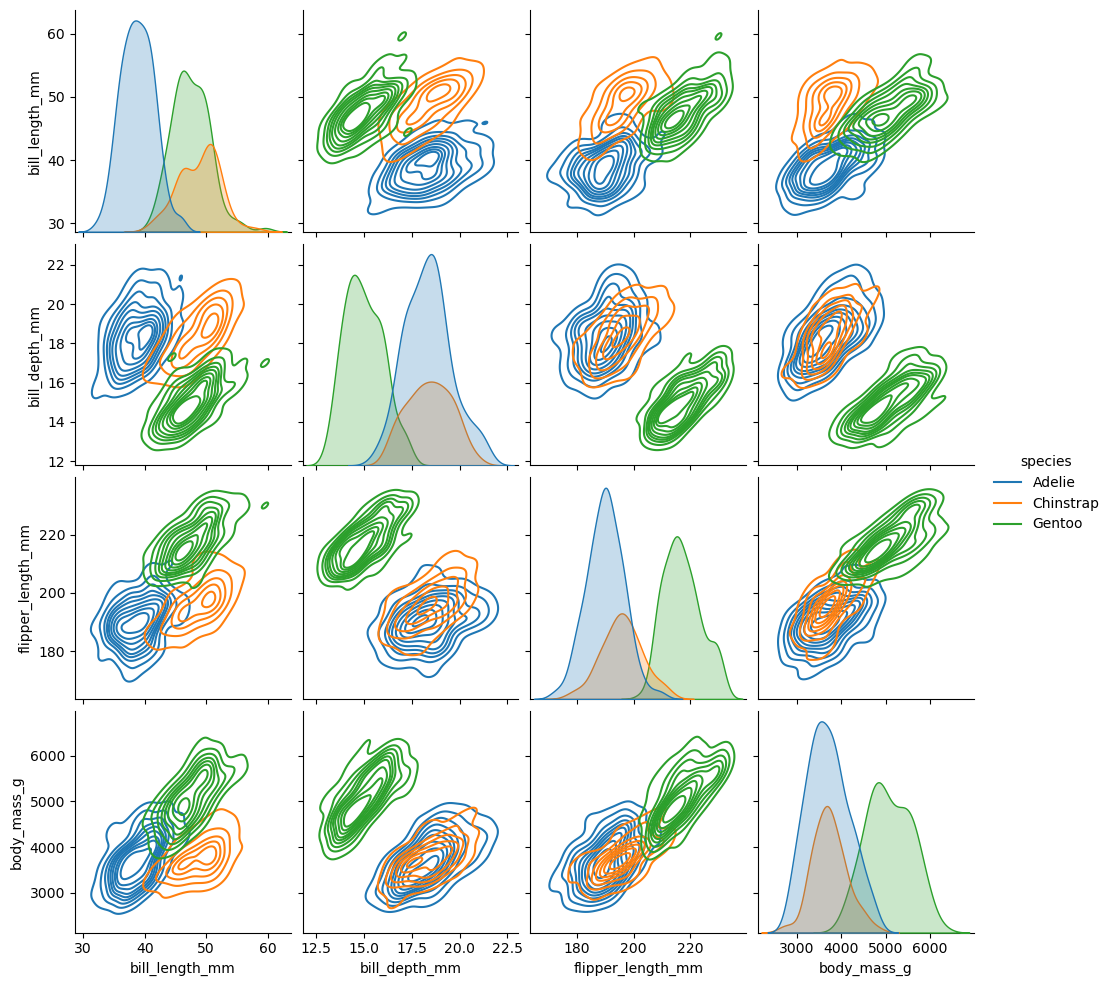

In [123]:
# pairplot()
sns.pairplot(penguins, hue='species', kind='kde')

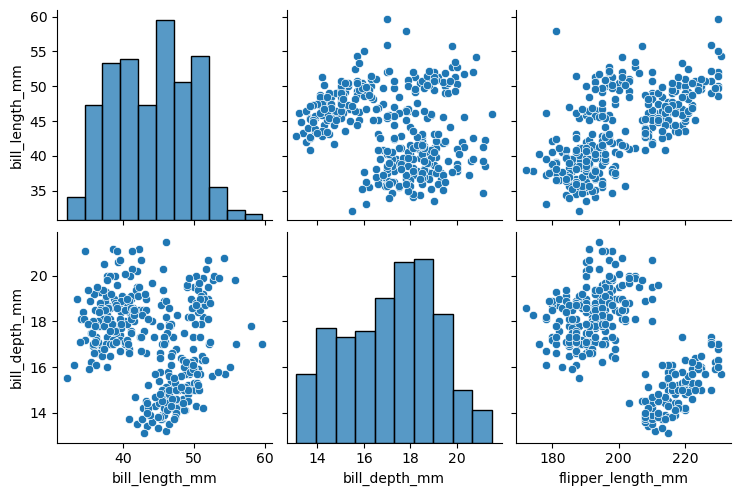

In [126]:
# pairplot()
sns.pairplot(
    penguins,
    x_vars=['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm'],
    y_vars=['bill_length_mm', 'bill_depth_mm'],
)

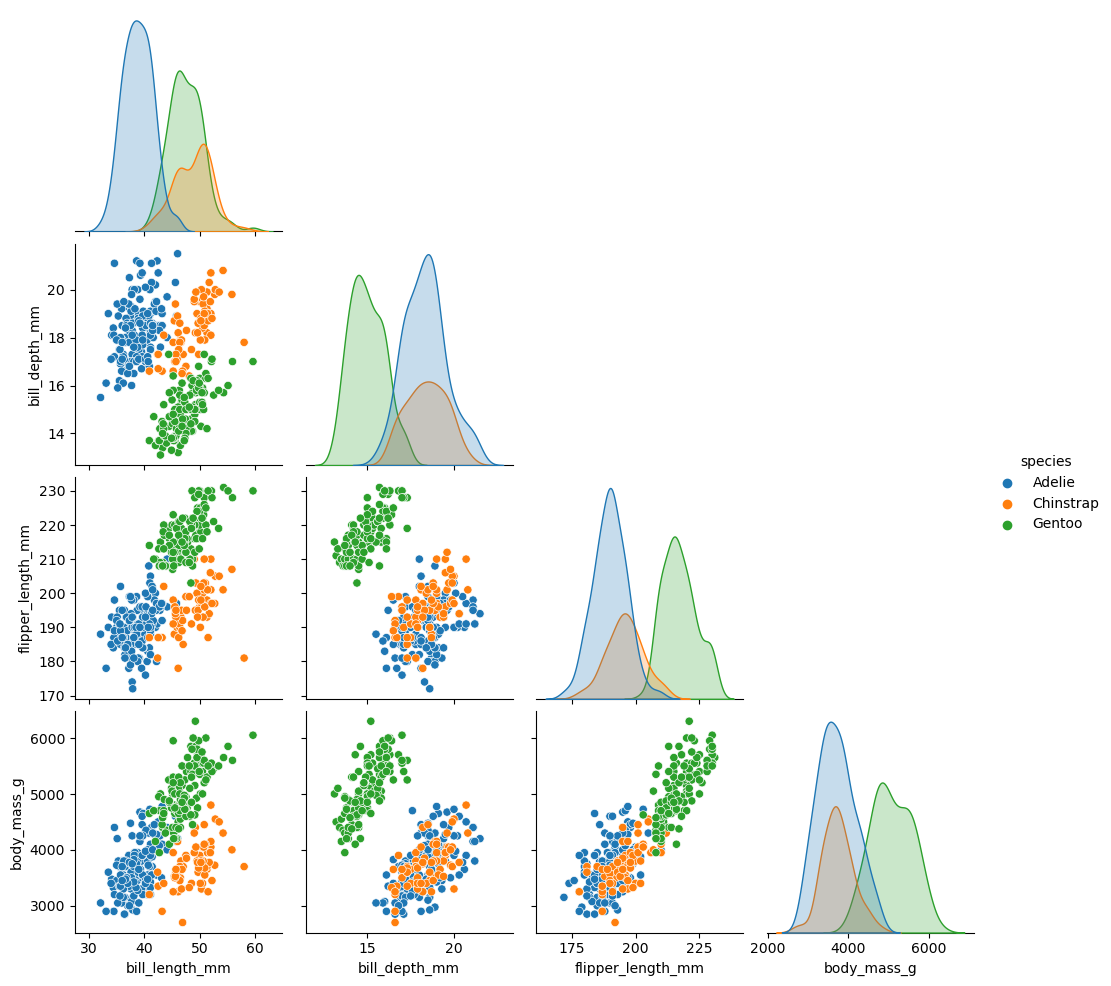

In [127]:
sns.pairplot(penguins, hue='species', corner=True)

## pandas pivot table

    - 데이터 column 중에서 두 개의 column을 각각 row 인덱스, column 인덱스로 사용하여 데이터를 조회하여 펼쳐놓은 것을 말함.
    - pivot table() 메서드 : 첫 번째 인수(DataFrame) , 두 번째 인수(데이터로 사용할 column 이름), 세 번째 인수(row 인덱스로 사용할 column name), 네번째 인수(column 인덱스로 사용할 column name)
    - 그 다음은 aggfunc 키워드 인자가 나오는데 
    1. pandas pivot table
    2. pandas.DataFrame.pivotable

In [129]:
titanic = sns.load_dataset('titanic')
pd.pivot_table(titanic, 'survived', index='class', columns='who')

who        child       man     woman
class                               
First   0.833333  0.352941  0.978022
Second  1.000000  0.080808  0.909091
Third   0.431034  0.119122  0.491228

In [131]:
pd.pivot_table(titanic, values='survived', index='class', 
               columns='who', aggfunc=np.sum)

who     child  man  woman
class                    
First       5   42     89
Second     19    8     60
Third      25   38     56

In [132]:
# 
pd.pivot_table(titanic, values='survived', index='class', 
               columns='deck', aggfunc=np.mean)

deck           A         B        C         D     E      F    G
class                                                          
First   0.466667  0.744681  0.59322  0.758621  0.72    NaN  NaN
Second       NaN       NaN      NaN  0.750000  0.75  0.875  NaN
Third        NaN       NaN      NaN       NaN  1.00  0.200  0.5

In [133]:
pd.pivot_table(titanic, values='survived', index='class', 
               columns='deck', aggfunc=np.mean, fill_value=0)

deck           A         B        C         D     E      F    G
class                                                          
First   0.466667  0.744681  0.59322  0.758621  0.72  0.000  0.0
Second  0.000000  0.000000  0.00000  0.750000  0.75  0.875  0.0
Third   0.000000  0.000000  0.00000  0.000000  1.00  0.200  0.5

## heatmap()

    - 데이터셋 중 비교하고자 하는 column의 pair가 모두 카테고리 값이거나, 피봇테이블의 결과를 가지고 heatmap()으로 표현하면 각 column 간의 상관 관계를 색상의 짙고 옅음으로 표현할 수 있음.
    

<AxesSubplot:xlabel='who', ylabel='class'>

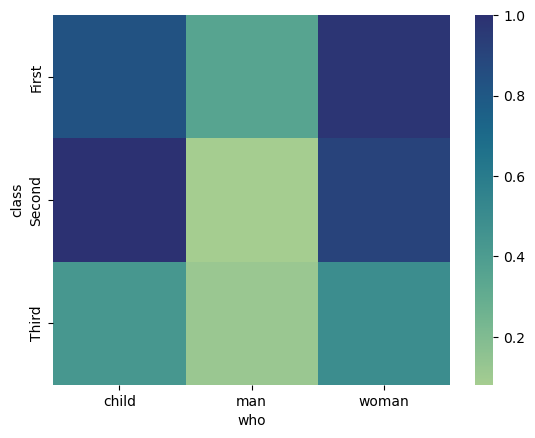

In [134]:
# heatmap() - cmap
ttn_cls_who = pd.pivot_table(titanic, 'survived', index='class', columns='who')
sns.heatmap(ttn_cls_who, cmap='crest')

<AxesSubplot:xlabel='who', ylabel='class'>

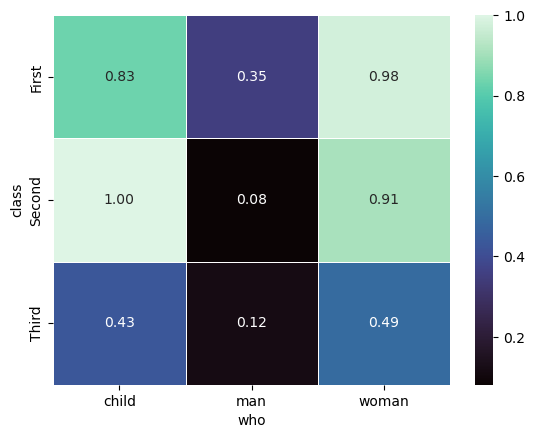

In [135]:
# heatmap()
sns.heatmap(ttn_cls_who, cmap='mako', annot=True, fmt='.2f', linewidth=.5)      # fmt 키워드 인수: 소숫점 둘째자리까지 표현 / linewidth : 구간표시선 굵기

In [137]:
tips = sns.load_dataset('tips')
tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

In [142]:
penguins = sns.load_dataset('penguins')
penguins

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2         3250.0  Female  
3            NaN     NaN  
4         3450.0  Female  
..           ...     ...  
338       4925.0  Female  
339          NaN     NaN  
340       4850.0  Female  
341       5750.0    Male  
342       5200.0  Female  

[343 rows x 7 columns]

## [연습문제] 
    healthexp 데이터셋으로 Seaborn 그래프를 통해 의미있는 결과 도출하기
        - 조합
            * 연도별 기대수명
            * 나라별 기대수명
            * 지출별 기대수명

In [147]:
# 1) 데이터셋 불러오기
healthexp = sns.load_dataset('healthexp')
healthexp

Year        Country  Spending_USD  Life_Expectancy
0    1970        Germany       252.311             70.6
1    1970         France       192.143             72.2
2    1970  Great Britain       123.993             71.9
3    1970          Japan       150.437             72.0
4    1970            USA       326.961             70.9
..    ...            ...           ...              ...
269  2020        Germany      6938.983             81.1
270  2020         France      5468.418             82.3
271  2020  Great Britain      5018.700             80.4
272  2020          Japan      4665.641             84.7
273  2020            USA     11859.179             77.0

[274 rows x 4 columns]

In [151]:
# 2) 데이터셋 결측치 확인하기
healthexp[healthexp.isna().any(axis=1)]

Empty DataFrame
Columns: [Year, Country, Spending_USD, Life_Expectancy]
Index: []

<AxesSubplot:xlabel='Year', ylabel='Life_Expectancy'>

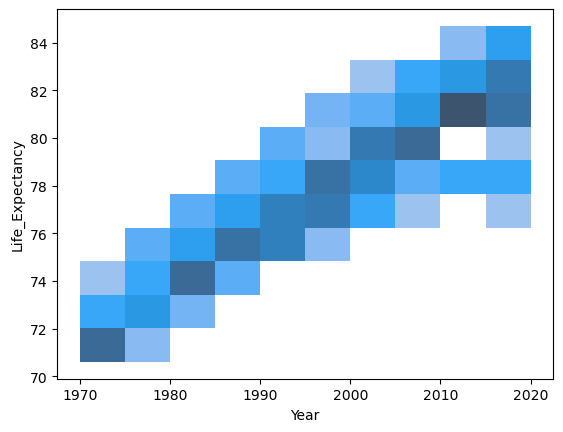

In [157]:
# 3) 연도별 기대수명 분포
sns.histplot(data=healthexp, x='Year', y='Life_Expectancy', kde=True)

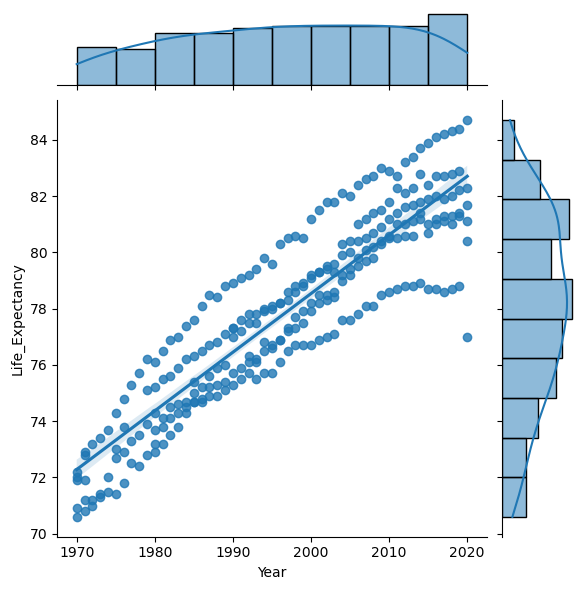

In [166]:
# 3-1) 연도별 기대수명 상관관계
sns.jointplot(data=healthexp, x='Year', y='Life_Expectancy', kind='reg')

<AxesSubplot:xlabel='Country', ylabel='Life_Expectancy'>

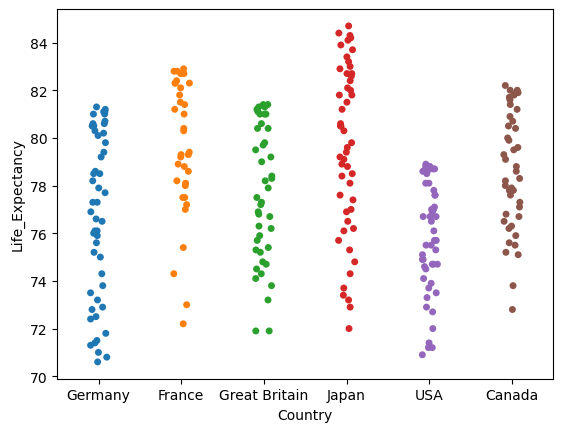

In [165]:
# 4) 나라별 기대수명 분포
sns.stripplot(data=healthexp, x='Country', y='Life_Expectancy')

In [ ]:
# 4-1) 일본과 미국의 기대수명 분포
sns.catplot()

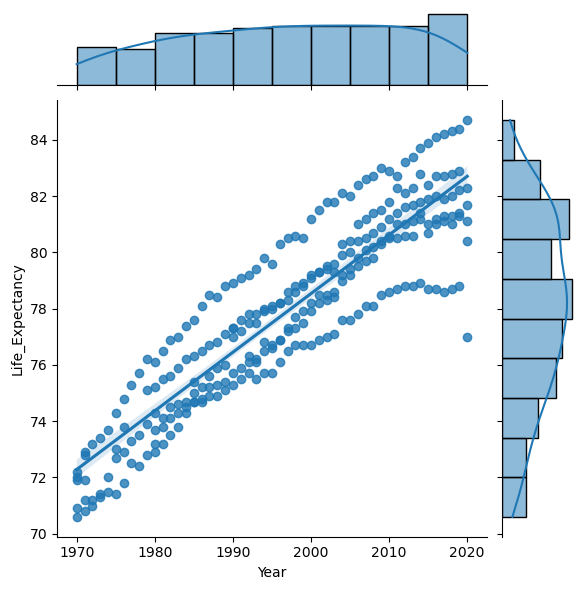

In [167]:
# 5) 지출별 기대수명 상관관계
sns.jointplot(data=healthexp, x='Year', y='Life_Expectancy', kind='reg')